# XID+PACS GAMA-12 Prior

In [11]:
import pylab
import pymoc
import xidplus
import numpy as np
%matplotlib inline
from astropy.table import Table , join
from mocpy import MOC
from astropy.io import fits
from astropy import wcs

In [12]:
import seaborn as sns

This notebook uses all the raw data from the XID+PACS catalogue, maps, PSF and relevant MOCs to create XID+ prior object and relevant tiling scheme

## Read in MOCs
The selection functions required are the main MOC associated with the masterlist. As the prior for XID+ is based on IRAC detected sources.

In [ ]:
Sel_func=pymoc.MOC()
Sel_func.read('../../dmu4/dmu4_sm_GAMA-12/data/holes_GAMA-12_ukidss_k_O16_20180419_MOC.fits')
filename='../../dmu18/dmu18_HELP-PACS-maps/data/GAMA-12_PACS100_v0.9.fits'
hdulist = fits.open(filename)
im100phdu=hdulist['IMAGE'].header
gama12_moc=MOC.from_image(im100phdu,13, ~np.isnan(hdulist['IMAGE'].data))
gama12_moc.write('./data/gama12_moc.fits')



im_moc=pymoc.MOC()
im_moc.read('./data/gama12_moc.fits')

Final=Sel_func.intersection(im_moc)


In [ ]:
#Final.write('./data/testMoc.fits', overwrite=True)
#Final=pymoc.MOC()
#Final.read('./data/testMoc.fits')

## Read in CIGALE predictions catalogue

In [4]:
cigale=Table.read('../../dmu28/dmu28_GAMA-12/data/GAMA-12_Ldust_prediction_results.fits')


In [5]:
cigale['id'].name = 'help_id'

In [6]:
cigale

help_id,bayes.dust.luminosity,bayes.dust.luminosity_err,best.omegacam_u,best.omegacam_g,best.suprime_g,best.decam_g,best.gpc1_g,best.suprime_r,best.gpc1_r,best.omegacam_r,best.decam_r,best.gpc1_i,best.omegacam_i,best.suprime_i,best.gpc1_z,best.vista_z,best.suprime_z,best.decam_z,best.gpc1_y,best.suprime_y,best.vista_y,best.ukidss_y,best.ukidss_j,best.vista_j,best.ukidss_h,best.vista_h,best.vista_ks,best.ukidss_k
,,,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy
bytes28,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
HELP_J112916.236+004455.105,9.652877937681845e+37,1.1766678409173006e+38,0.000980295023013616,0.0015294569259221348,0.0015552267277079985,0.0015603137435057492,0.0015811572677988642,0.003194426484630147,0.0032349965854413334,0.0034445239272319866,0.0036535349776492154,0.005065501198848522,0.005074294272525081,0.005165870926847348,0.005710549140420972,0.005799151537997928,0.005893625255034905,0.006068038481455672,0.00634927742142078,0.006414618774161262,0.0065929279545086,0.0066598767650885874,0.008096326042717792,0.008110674388466112,0.010652489300310508,0.010679241978454539,0.012223806234222284,0.012416388818194771
HELP_J112916.735+004525.955,4.996041519244056e+38,6.0140562531586676e+38,0.002289617379823237,0.004161818705328062,0.00425796740958204,0.004276146711710309,0.004347885113219617,0.009598016200118159,0.009657437961817474,0.010385677257061963,0.011085903901470942,0.01685556324117063,0.017086031391132045,0.017508498251530096,0.022315925077628453,0.02287077476022504,0.023584596917840976,0.02484483030692972,0.027143746691988383,0.02782771221301429,0.029982841008669017,0.030628334494560913,0.04372049906367178,0.04393112752986191,0.06931505703338049,0.06967740395278635,0.09061662122507765,0.09364943803243464
HELP_J112916.868+004538.834,6.743951789320467e+35,2.1173250319725105e+35,0.00797875041146088,0.02980803938006447,0.030587365814790615,0.030750760058357213,0.031623273659674545,0.05743273711118947,0.057787231266229755,0.05988838250592578,0.061753501772432697,0.0808511378305513,0.08167243563101165,0.08331869899532499,0.10187379114129923,0.10419566844502802,0.10698228630537966,0.11402155609826929,0.12581586850318172,0.12929421768016797,0.13785416105492476,0.1401027291304574,0.16353112553667346,0.16385860464563604,0.20705179115301087,0.20852137409255886,0.19551549798399098,0.19135190687006612
HELP_J112916.993+004528.665,1.0694121816308823e+37,1.1878692112187377e+37,0.0009588808608041965,0.002040942316873566,0.002129780788744615,0.002150539571625704,0.0022121266190192946,0.004380283447462689,0.004396330947582648,0.00453091385132659,0.00465871777647253,0.006022178004153719,0.006072130839054361,0.006181126116500576,0.007181560741821394,0.007299813358211741,0.0074405068388268495,0.007810170445369271,0.008488444014190927,0.008622610780257783,0.009027094501232926,0.009142849940643617,0.012212649292989828,0.012232476273615987,0.01452436164549038,0.014569890633646571,0.017942068345588966,0.01780885887519865
HELP_J112917.687+004454.217,8.271422685054857e+37,5.409135851765624e+37,0.0013758533723229232,0.005381981842027911,0.005814869635601862,0.0059033034489654294,0.006142373887441594,0.018297075997784327,0.01837009855440917,0.01949743073052938,0.02052489445477839,0.0319632835878968,0.032430974623685965,0.03345464519735685,0.04379755625187017,0.04475752593662178,0.04613679542662961,0.04983271206440684,0.05561606012836359,0.05802881816076636,0.06285880088413186,0.06402997341269316,0.098059365204896,0.09848184564906226,0.13765475719066567,0.13852205753378716,0.19602762997249945,0.19808723364933625
HELP_J112917.704+004533.215,2.621974984462708e+36,1.3701873131959277e+36,0.0165345729910376,0.08406187751160515,0.0873091714540851,0.08794545854754907,0.09099895711542945,0.19537287285608138,0.1963131

In [7]:
for i in range(0,len(cigale['help_id'])):
    cigale['help_id'][i]=cigale['help_id'][i].strip()


## Read in photoz

In [8]:
photoz=Table.read('../../dmu24/dmu24_GAMA-12/data/master_catalogue_gama-12_20171210_photoz_20180410_r_optimised.fits')

In [9]:
photoz

help_id,RA,DEC,id,z1_median,z1_min,z1_max,z1_area,z2_median,z2_min,z2_max,z2_area,za_hb,chi_r_eazy,chi_r_atlas,chi_r_cosmos,chi_r_stellar,stellar_type
bytes28,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes6
HELP_J115809.625-010119.203,179.54010411484222,-1.022000837333718,415493,0.6959,0.2271,1.1167,0.776,1.7302,1.6579,1.8051,0.023,0.716334851089142,0.002686655,0.0150886325,0.0201354525,0.3918725,m3iii
HELP_J115850.554-004148.083,179.71064084924967,-0.6966898527000007,415494,0.8684,0.4865,1.214,0.752,1.7465,1.6739,1.822,0.043,0.8721001529110377,0.04407825,0.02533725,0.043383625,3.34674,m4iii
HELP_J114948.465+001147.728,177.45193642612378,0.19659122452690234,415495,0.887,0.4999,1.2677,0.724,1.6913,1.595,1.7884,0.07,0.8777164533697708,0.35133575,0.08987975,0.029299375,4.303075,m4v
HELP_J120125.808-000108.647,180.3575328813382,-0.0190684827783537,415496,0.9072,0.583,1.2542,0.75,1.6694,1.6106,1.7305,0.043,0.8946666504926839,0.0040718675,0.0216934375,0.028596175,1.58375425,m4iii
HELP_J120150.572+005703.469,180.4607176743377,0.9509637326107814,415497,1.6554,1.4222,1.822,0.799,-99.0,-99.0,-99.0,-99.0,1.6578975824721525,1.186299,4.031635,2.62545,4.5122975,m7iii
HELP_J120422.567-005913.736,181.09402892998088,-0.9871487696687196,415498,0.8732,0.5548,1.2474,0.702,1.5987,1.4735,1.7224,0.091,0.8889996515380697,0.00577969,0.25491375,0.28173975,0.54081825,m4iii
HELP_J115939.276+003916.795,179.91364829654617,0.6546651721328913,415499,0.7295,0.1838,1.3019,0.615,1.9048,1.595,2.2389,0.183,0.716334851089142,0.00098887325,0.0336144,0.04352285,1.25826925,rk3iii
HELP_J115154.051+010414.748,177.9752121056559,1.070763318504169,415500,0.9787,0.6508,1.3088,0.655,1.6778,1.5335,1.822,0.137,0.9936488758477084,0.199398525,0.020380665,0.048394,4.22107,m5iii
HELP_J120457.625+010258.007,181.2401058180152,1.0494463323665646,415501,0.5947,0.1284,1.2542,0.709,1.8528,1.6819,2.0323,0.087,0.39584643832634897,0.006772955,0.0390784,0.2812145,0.90032575,rk0iii


## Join CIGALE and photoz tables

In [10]:
prior=join(cigale,photoz,keys='help_id')

In [11]:
from astropy.cosmology import Planck15 as cosmo
from astropy import units as u
f_pred=prior['bayes.dust.luminosity']/(4*np.pi*cosmo.luminosity_distance(prior['z1_median']).to(u.cm))


In [12]:
prior=prior[np.isfinite(f_pred.value)][np.log10(f_pred.value[np.isfinite(f_pred.value)])>8.5]

In [13]:
prior['DEC'].name='Dec'

## Read in Maps

In [16]:
im100fits='../../dmu18/dmu18_HELP-PACS-maps/data/GAMA-12_PACS100_v0.9.fits'
im160fits='../../dmu18/dmu18_HELP-PACS-maps/data/GAMA-12_PACS160_v0.9.fits'
#output folder
output_folder='./'

In [17]:
from astropy.io import fits
from astropy import wcs


#-----100-------------
hdulist = fits.open(im100fits)
im100phdu=hdulist['PRIMARY'].header
im100hdu=hdulist['IMAGE'].header
im100=hdulist['IMAGE'].data
w_100 = wcs.WCS(hdulist['IMAGE'].header)
pixsize100=3600.0*np.abs(hdulist['IMAGE'].header['CDELT1']) #pixel size (in arcseconds)
nim100=hdulist['ERROR'].data

hdulist.close()

#-----160-------------
hdulist = fits.open(im160fits)
im160phdu=hdulist['PRIMARY'].header
im160hdu=hdulist['IMAGE'].header
im160=hdulist['IMAGE'].data
w_160 = wcs.WCS(hdulist['IMAGE'].header)
pixsize160=3600.0*np.abs(hdulist['IMAGE'].header['CDELT1']) #pixel size (in arcseconds)
nim160=hdulist['ERROR'].data

hdulist.close()


## Read in PSF

In [19]:
pacs100_psf=fits.open('../../dmu18/dmu18_GAMA-12/data/dmu18_PACS_100_PSF_GAMA12_20190131.fits')
pacs160_psf=fits.open('../../dmu18/dmu18_GAMA-12/data/dmu18_PACS_160_PSF_GAMA12_20190131.fits')

centre100=np.long((pacs100_psf[0].header['NAXIS1']-1)/2)
radius100=10
centre160=np.long((pacs160_psf[0].header['NAXIS1']-1)/2)
radius160=10

pind100=np.arange(0,radius100+1+radius100,1)*3600*np.abs(pacs100_psf[0].header['CDELT1'])/pixsize100 #get 100 scale in terms of pixel scale of map
pind160=np.arange(0,radius160+1+radius160,1)*3600*np.abs(pacs160_psf[0].header['CDELT1'])/pixsize160 #get 160 scale in terms of pixel scale of map

In [20]:
centre100

10

In [21]:
print(pind100)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20.]


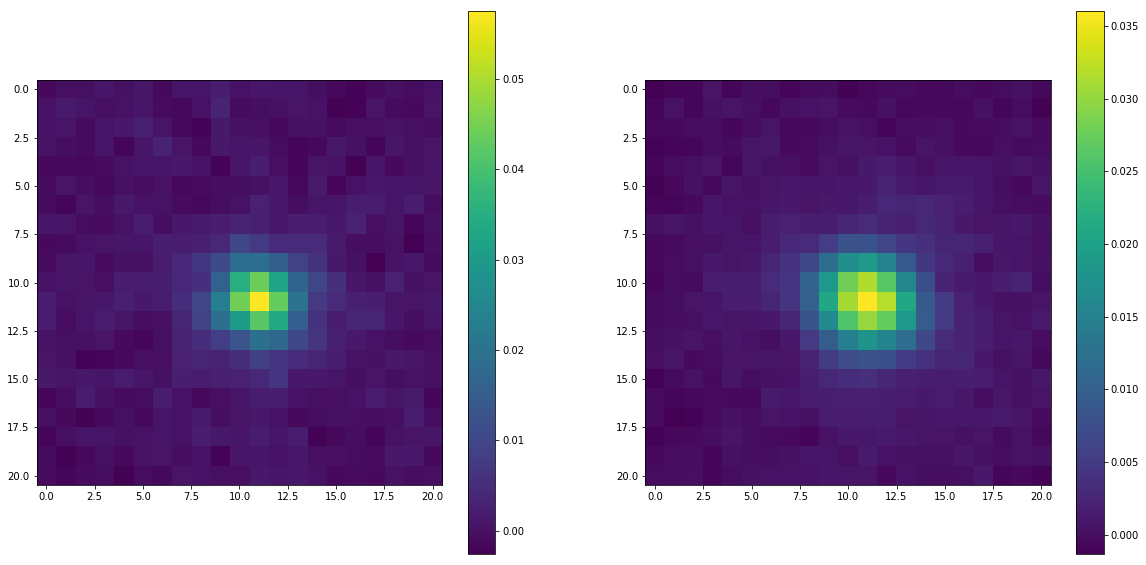

In [22]:
import pylab as plt
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(pacs100_psf[0].data[centre100-radius100:centre100+radius100+1,centre100-radius100:centre100+radius100+1])
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(pacs160_psf[0].data[centre160-radius160:centre160+radius160+1,centre160-radius160:centre160+radius160+1])
plt.colorbar()

## Set XID+ prior class

In [23]:
#---prior100--------
prior100=xidplus.prior(im100,nim100,im100phdu,im100hdu, moc=Sel_func)#Initialise with map, uncertianty map, wcs info and primary header
prior100.prior_cat(prior['RA'] ,prior['Dec'] ,'GAMA-12_Ldust_prediction_results.fits',ID=prior['help_id'])#Set input catalogue
prior100.prior_bkg(0.0,5)#Set prior on background (assumes Gaussian pdf with mu and sigma)

#---prior160--------
prior160=xidplus.prior(im160,nim160,im160phdu,im160hdu, moc=Sel_func)
prior160.prior_cat(prior['RA'] ,prior['Dec'] ,'GAMA-12_Ldust_prediction_results.fits',ID=prior['help_id'])
prior160.prior_bkg(0.0,5)

Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]


MemoryError: 

In [16]:
# Divide by 1000 so that units are mJy
prior100.set_prf(pacs100_psf[1].data[centre100-radius100:centre100+radius100+1,centre100-radius100:centre100+radius100+1]/1000.0,
                pind100,pind100)
prior160.set_prf(pacs160_psf[1].data[centre160-radius160:centre160+radius160+1,centre160-radius160:centre160+radius160+1]/1000.0,
                pind160,pind160)

In [17]:
import pickle
#from moc, get healpix pixels at a given order
from xidplus import moc_routines
order=11
tiles=moc_routines.get_HEALPix_pixels(order,prior100.sra,prior100.sdec,unique=True)
order_large=6
tiles_large=moc_routines.get_HEALPix_pixels(order_large,prior100.sra,prior100.sdec,unique=True)
print('----- There are '+str(len(tiles))+' tiles required for input catalogue and '+str(len(tiles_large))+' large tiles')
output_folder='./data/'
xidplus.io.pickle_dump({'priors':[prior100,prior160],'tiles':tiles,'order':order,'version':xidplus.io.git_version()},'Master_prior.pkl')
outfile=output_folder+'Tiles.pkl'
with open(outfile, 'wb') as f:
    pickle.dump({'tiles':tiles,'order':order,'tiles_large':tiles_large,'order_large':order_large,'version':xidplus.io.git_version()},f)
raise SystemExit()

----- There are 2165 tiles required for input catalogue and 18 large tiles
writing total_bytes=781068219...
writing bytes [0, 781068219)... done.


SystemExit: 

In [18]:
ls -ltrh

total 1525656
drwxr-xr-x@ 3 pdh21  pdh21   102B 14 Feb 16:33 data/
-rw-rw-r--  1 pdh21  pdh21    41K 15 Feb 11:16 XID+PACS_prior.ipynb
-rw-rw-r--  1 pdh21  pdh21    18K 15 Feb 11:25 Tiles.pkl
-rw-rw-r--  1 pdh21  pdh21   745M 15 Feb 11:25 Master_prior.pkl
